In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, auc, roc_auc_score, roc_curve
from sklearn.svm import SVC
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV
from itertools import cycle
from sklearn.preprocessing import LabelEncoder

In [2]:
drive.mount('/content/drive', force_remount=True)
location ='drive/MyDrive/ML-Dataset/'
list_of_files = os.listdir(location)

Mounted at /content/drive


In [3]:
df_car= pd.read_excel(location+'car_evaluation.xlsx', header=None)

In [4]:
df_car.head(10)

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [5]:
X = df_car.iloc[:,0:6]
y = df_car.iloc[:, [6]]

In [6]:
ordinal_encoder = OrdinalEncoder()
X = X.astype(str)
X = ordinal_encoder.fit_transform(X)

le = LabelEncoder()
y=le.fit_transform(y.values.ravel())

In [7]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, train_size = 0.8, random_state = 42)
# model = SVC()

# param_grid = {'C':[10.001, 0.01, 0.1, 1, 10, 100],'gamma':[0.001, 0.01, 0.1, 1, 10, 100], 'kernel':['rbf']}
# clf = GridSearchCV(estimator= model, param_grid=param_grid, refit = True, return_train_score=True)
# score = clf.fit(X_train, np.ravel(y_train,order='C'))
# print("Best Parameters for SVM - rbf = {} ".format(clf.best_params_))

# param_grid = {'C':[10.001, 0.01, 0.1, 1, 10, 100], 'kernel':['poly']}
# clf = GridSearchCV(estimator= model, param_grid=param_grid, refit = True, return_train_score=True)
# score = clf.fit(X_train, np.ravel(y_train,order='C'))
# print("Best Parameters for SVM - poly = {} ".format(clf.best_params_))

Best Parameters for SVM - rbf = {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'} 
Best Parameters for SVM - poly = {'C': 10.001, 'kernel': 'poly'} 


In [8]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [9]:
svm  = {'rbf':SVC(C= 100, gamma= 0.1, kernel= 'rbf'), 'poly': SVC(C= 10.001, kernel= 'poly')}

In [10]:
def f_performance(cm):
  FP = cm.sum(axis=0) - np.diag(cm)
  FP = FP.astype(float)
  FN = cm.sum(axis=1) - np.diag(cm)
  FN = FN.astype(float)
  TP = np.diag(cm)
  TP = TP.astype(float)
  TN = cm.sum() - (FP + FN + TP)
  TN = TN.astype(float)

  # Sensitivity
  TPR = TP/(TP+FN)
  # Specificity
  TNR = TN/(TN+FP)
  # Precision
  PPV = TP/(TP+FP)
  # False positive rate
  FPR = FP/(FP+TN)
  # False negative rate
  FNR = FN/(TP+FN)

  for i in range(0,4):
    print("Sensitivity_class_{}: {}".format(i,TPR[i]))
    print("Specificity_class_{}: {}".format(i,TNR[i]))
    print("Precision_class_{}: {}".format(i, PPV[i]))
    f1_score = (2*PPV[i]*TPR[i])/(PPV[i]+TPR[i])
    print("F1_score_class_{}: {}".format(i, f1_score))
    print()




Performance Fold wise  

*****Kernel function****** : rbf
Accuracy for fold 1:  0.9913294797687862


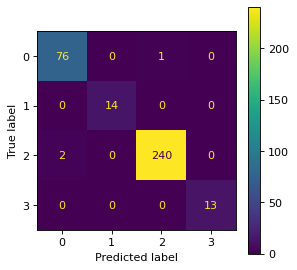

Sensitivity_class_0: 0.987012987012987
Specificity_class_0: 0.9925650557620818
Precision_class_0: 0.9743589743589743
F1_score_class_0: 0.9806451612903225

Sensitivity_class_1: 1.0
Specificity_class_1: 1.0
Precision_class_1: 1.0
F1_score_class_1: 1.0

Sensitivity_class_2: 0.9917355371900827
Specificity_class_2: 0.9903846153846154
Precision_class_2: 0.995850622406639
F1_score_class_2: 0.9937888198757764

Sensitivity_class_3: 1.0
Specificity_class_3: 1.0
Precision_class_3: 1.0
F1_score_class_3: 1.0



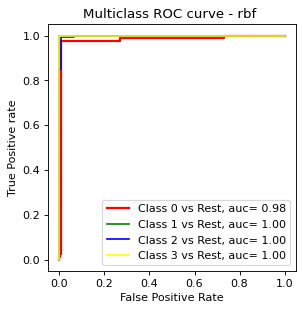

Accuracy for fold 2:  1.0


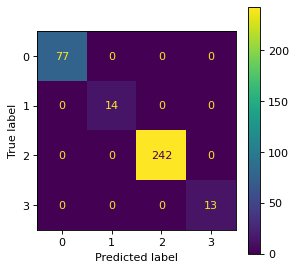

Sensitivity_class_0: 1.0
Specificity_class_0: 1.0
Precision_class_0: 1.0
F1_score_class_0: 1.0

Sensitivity_class_1: 1.0
Specificity_class_1: 1.0
Precision_class_1: 1.0
F1_score_class_1: 1.0

Sensitivity_class_2: 1.0
Specificity_class_2: 1.0
Precision_class_2: 1.0
F1_score_class_2: 1.0

Sensitivity_class_3: 1.0
Specificity_class_3: 1.0
Precision_class_3: 1.0
F1_score_class_3: 1.0



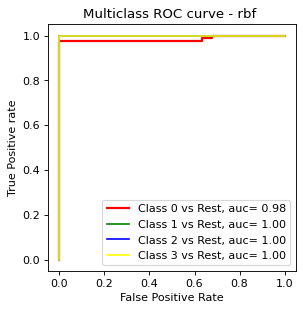

Accuracy for fold 3:  0.9971098265895953


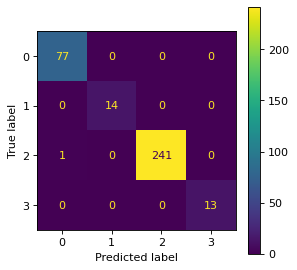

Sensitivity_class_0: 1.0
Specificity_class_0: 0.9962825278810409
Precision_class_0: 0.9871794871794872
F1_score_class_0: 0.9935483870967742

Sensitivity_class_1: 1.0
Specificity_class_1: 1.0
Precision_class_1: 1.0
F1_score_class_1: 1.0

Sensitivity_class_2: 0.9958677685950413
Specificity_class_2: 1.0
Precision_class_2: 1.0
F1_score_class_2: 0.9979296066252588

Sensitivity_class_3: 1.0
Specificity_class_3: 1.0
Precision_class_3: 1.0
F1_score_class_3: 1.0



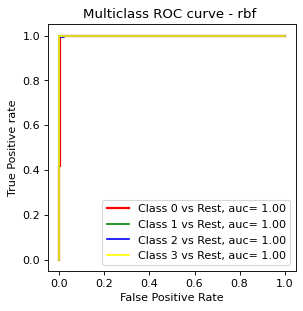

Accuracy for fold 4:  0.9942028985507246


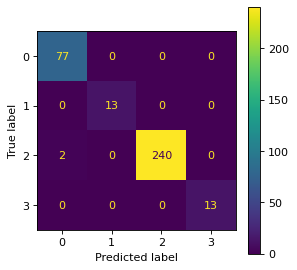

Sensitivity_class_0: 1.0
Specificity_class_0: 0.9925373134328358
Precision_class_0: 0.9746835443037974
F1_score_class_0: 0.9871794871794872

Sensitivity_class_1: 1.0
Specificity_class_1: 1.0
Precision_class_1: 1.0
F1_score_class_1: 1.0

Sensitivity_class_2: 0.9917355371900827
Specificity_class_2: 1.0
Precision_class_2: 1.0
F1_score_class_2: 0.995850622406639

Sensitivity_class_3: 1.0
Specificity_class_3: 1.0
Precision_class_3: 1.0
F1_score_class_3: 1.0



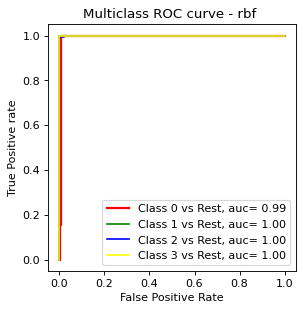

Accuracy for fold 5:  0.9971014492753624


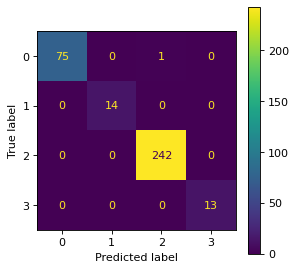

Sensitivity_class_0: 0.9868421052631579
Specificity_class_0: 1.0
Precision_class_0: 1.0
F1_score_class_0: 0.9933774834437086

Sensitivity_class_1: 1.0
Specificity_class_1: 1.0
Precision_class_1: 1.0
F1_score_class_1: 1.0

Sensitivity_class_2: 1.0
Specificity_class_2: 0.9902912621359223
Precision_class_2: 0.9958847736625515
F1_score_class_2: 0.9979381443298969

Sensitivity_class_3: 1.0
Specificity_class_3: 1.0
Precision_class_3: 1.0
F1_score_class_3: 1.0



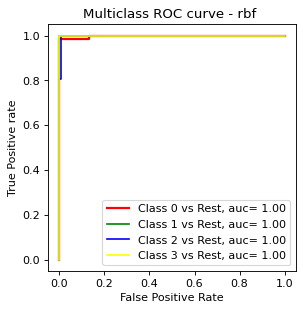

*****Kernel function****** : poly
Accuracy for fold 1:  0.8583815028901735


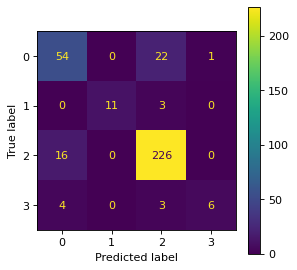

Sensitivity_class_0: 0.7012987012987013
Specificity_class_0: 0.9256505576208178
Precision_class_0: 0.7297297297297297
F1_score_class_0: 0.7152317880794701

Sensitivity_class_1: 0.7857142857142857
Specificity_class_1: 1.0
Precision_class_1: 1.0
F1_score_class_1: 0.88

Sensitivity_class_2: 0.9338842975206612
Specificity_class_2: 0.7307692307692307
Precision_class_2: 0.889763779527559
F1_score_class_2: 0.9112903225806451

Sensitivity_class_3: 0.46153846153846156
Specificity_class_3: 0.996996996996997
Precision_class_3: 0.8571428571428571
F1_score_class_3: 0.6



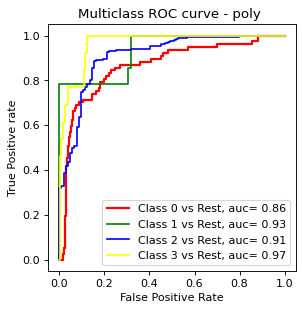

Accuracy for fold 2:  0.884393063583815


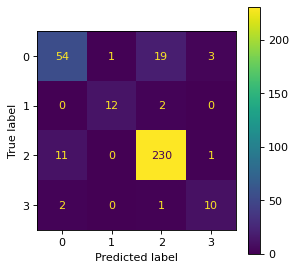

Sensitivity_class_0: 0.7012987012987013
Specificity_class_0: 0.9516728624535316
Precision_class_0: 0.8059701492537313
F1_score_class_0: 0.75

Sensitivity_class_1: 0.8571428571428571
Specificity_class_1: 0.9969879518072289
Precision_class_1: 0.9230769230769231
F1_score_class_1: 0.888888888888889

Sensitivity_class_2: 0.9504132231404959
Specificity_class_2: 0.7884615384615384
Precision_class_2: 0.9126984126984127
F1_score_class_2: 0.9311740890688259

Sensitivity_class_3: 0.7692307692307693
Specificity_class_3: 0.987987987987988
Precision_class_3: 0.7142857142857143
F1_score_class_3: 0.7407407407407408



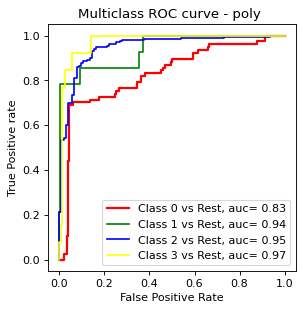

Accuracy for fold 3:  0.8786127167630058


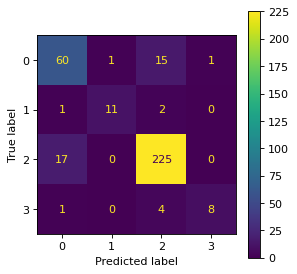

Sensitivity_class_0: 0.7792207792207793
Specificity_class_0: 0.929368029739777
Precision_class_0: 0.759493670886076
F1_score_class_0: 0.7692307692307693

Sensitivity_class_1: 0.7857142857142857
Specificity_class_1: 0.9969879518072289
Precision_class_1: 0.9166666666666666
F1_score_class_1: 0.8461538461538461

Sensitivity_class_2: 0.9297520661157025
Specificity_class_2: 0.7980769230769231
Precision_class_2: 0.9146341463414634
F1_score_class_2: 0.9221311475409836

Sensitivity_class_3: 0.6153846153846154
Specificity_class_3: 0.996996996996997
Precision_class_3: 0.8888888888888888
F1_score_class_3: 0.7272727272727274



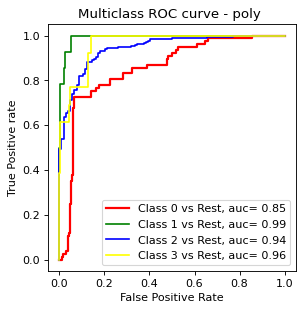

Accuracy for fold 4:  0.8724637681159421


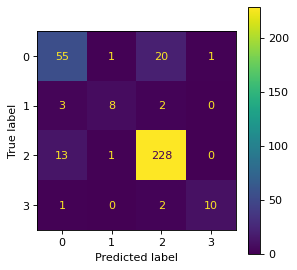

Sensitivity_class_0: 0.7142857142857143
Specificity_class_0: 0.9365671641791045
Precision_class_0: 0.7638888888888888
F1_score_class_0: 0.7382550335570469

Sensitivity_class_1: 0.6153846153846154
Specificity_class_1: 0.9939759036144579
Precision_class_1: 0.8
F1_score_class_1: 0.6956521739130435

Sensitivity_class_2: 0.9421487603305785
Specificity_class_2: 0.7669902912621359
Precision_class_2: 0.9047619047619048
F1_score_class_2: 0.9230769230769231

Sensitivity_class_3: 0.7692307692307693
Specificity_class_3: 0.9969879518072289
Precision_class_3: 0.9090909090909091
F1_score_class_3: 0.8333333333333333



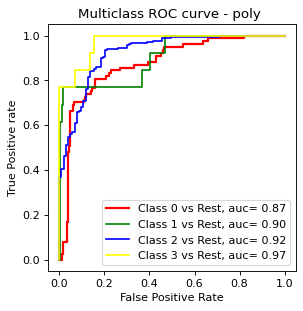

Accuracy for fold 5:  0.9014492753623189


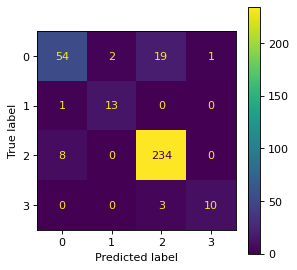

Sensitivity_class_0: 0.7105263157894737
Specificity_class_0: 0.966542750929368
Precision_class_0: 0.8571428571428571
F1_score_class_0: 0.776978417266187

Sensitivity_class_1: 0.9285714285714286
Specificity_class_1: 0.9939577039274925
Precision_class_1: 0.8666666666666667
F1_score_class_1: 0.896551724137931

Sensitivity_class_2: 0.9669421487603306
Specificity_class_2: 0.7864077669902912
Precision_class_2: 0.9140625
F1_score_class_2: 0.9397590361445782

Sensitivity_class_3: 0.7692307692307693
Specificity_class_3: 0.9969879518072289
Precision_class_3: 0.9090909090909091
F1_score_class_3: 0.8333333333333333



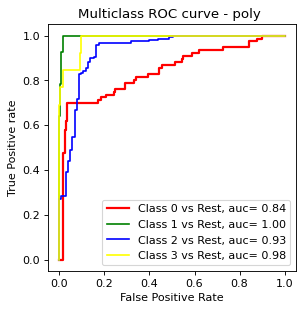

In [11]:
for key, value in svm.items():
  print("*****Kernel function****** : {}".format(key))
  fold = 1
  for train_index, test_index in cv.split(X, y):
      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = y[train_index], y[test_index]
      value.fit(X_train, y_train)
      y_pred = value.predict(X_test)
      score = accuracy_score(y_test, y_pred)
      cm = confusion_matrix(y_test, y_pred)

      # Accuracy fold wise
      print(f"Accuracy for fold {fold}: ", score)

      plt.rcParams.update({'figure.figsize':(4,4), 'figure.dpi':80})

      #confusion matrix
      disp = ConfusionMatrixDisplay(confusion_matrix=cm)
      disp.plot()
      plt.show()

      # Sensitivity, Specificity, F1_score, Precision
      f_performance(cm)

      # roc-curve
      pred_prob = value.decision_function(X_test)

      fpr = {}
      tpr = {}
      thresh ={}
      roc_auc = {}
      n_class = 4

      for i in range(n_class):    
          fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
          roc_auc[i]=auc(fpr[i],tpr[i])        
      plt.plot(fpr[0], tpr[0], color='red', label='Class 0 vs Rest, auc= %0.2f' %roc_auc[0],lw=2)
      plt.plot(fpr[1], tpr[1], color='green', label='Class 1 vs Rest, auc= %0.2f'%roc_auc[1])
      plt.plot(fpr[2], tpr[2], color='blue', label='Class 2 vs Rest, auc= %0.2f'%roc_auc[2])
      plt.plot(fpr[3], tpr[3], color='yellow', label='Class 3 vs Rest, auc= %0.2f' %roc_auc[3])
      plt.title('Multiclass ROC curve - {} '.format(key))
      plt.xlabel('False Positive Rate')
      plt.ylabel('True Positive rate')
      plt.legend(loc='best')
      plt.show()
      fold += 1